<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

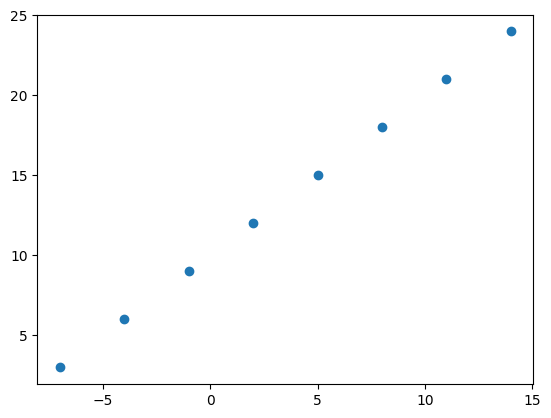

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [4]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [7]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 418ms/step - loss: 12.8266 - mae: 12.8266
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 12.6941 - mae: 12.6941
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 12.5616 - mae: 12.5616
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 12.4291 - mae: 12.4291
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 12.2966 - mae: 12.2966


In [8]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 117ms/step


array([[6.2959514]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [10]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 380ms/step - loss: 11.1398 - mae: 11.1398
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0073 - mae: 11.0073
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8748 - mae: 10.8748
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7423 - mae: 10.7423
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6098 - mae: 10.6098
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4773 - mae: 10.4773
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3448 - mae: 10.3448
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2123 - mae: 10.2123
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 10.0798 - mae: 10.0798
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9473 - mae: 9.9473
Epoch 11/100
1/1 [==============================] 

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[30.138603]], dtype=float32)

In [13]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 784ms/step - loss: 13.2700 - mae: 13.2700
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9518 - mae: 12.9518
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6507 - mae: 12.6507
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3518 - mae: 12.3518
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0223 - mae: 12.0223
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6639 - mae: 11.6639
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2786 - mae: 11.2786
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8165 - mae: 10.8165
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3307 - mae: 10.3307
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7530 - mae: 9.7530
Epoch 11/100
1/1 [==============================] 

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 110ms/step


array([[33.43577]], dtype=float32)

In [15]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 984ms/step - loss: 13.5541 - mae: 13.5541
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5115 - mae: 13.5115
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4690 - mae: 13.4690
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 13.4267 - mae: 13.4267
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3837 - mae: 13.3837
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3403 - mae: 13.3403
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2966 - mae: 13.2966
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2527 - mae: 13.2527
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 13.2089 - mae: 13.2089
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1650 - mae: 13.1650
Epoch 11/100
1/1 [==============================

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[10.719039]], dtype=float32)

In [33]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 24.3375 - mae: 24.3375
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5476 - mae: 11.5476
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.5629 - mae: 10.5629
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5584 - mae: 11.5584
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8855 - mae: 8.8855
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9856 - mae: 8.9856
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6397 - mae: 9.6397
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8754 - mae: 8.8754
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.2029 - mae: 8.2029
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.0132 - mae: 8.0132
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss

In [34]:
model.predict([17.0])

1/1 [==============================] - 0s 77ms/step


array([[27.468872]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

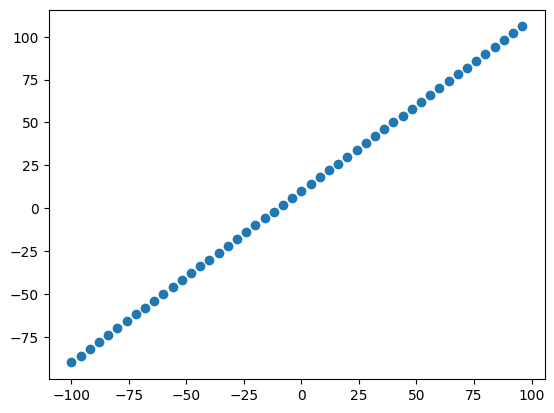

In [21]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [22]:
X_train = X[:40]
X_test = X[40:]

In [23]:
y_train = y[:40]
y_test = y[40:]

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

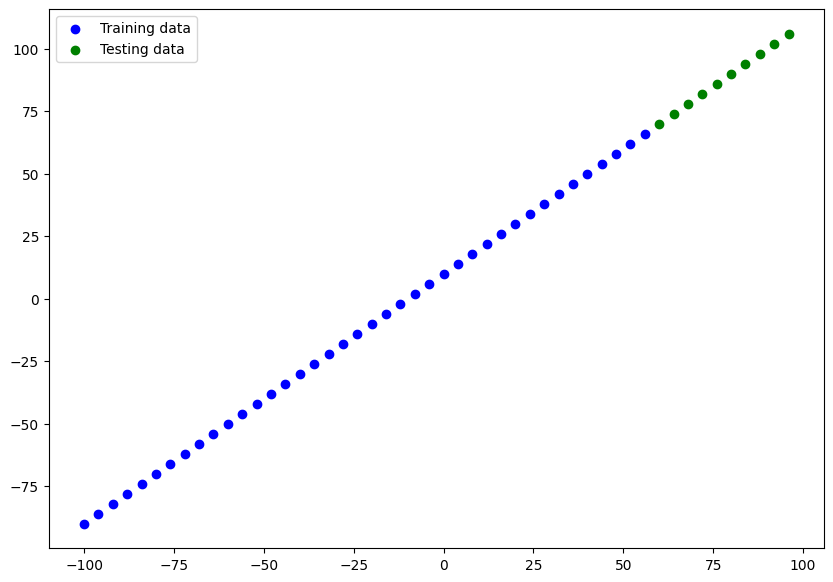

In [25]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [27]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [ ]:
# model = tf.keras.Sequential([
#      tf.keras.layers.Dense(50, activation = None),
#      tf.keras.layers.Dense(1)
#  ])


# model.compile(loss= tf.keras.losses.mae,
#                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
#                metrics=["mae"])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

In [29]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                100       
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


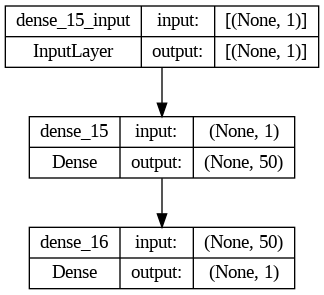

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [37]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 71.656265],
       [ 75.766716],
       [ 79.87717 ],
       [ 83.987625],
       [ 88.09809 ],
       [ 92.20854 ],
       [ 96.319   ],
       [100.42946 ],
       [104.5399  ],
       [108.65035 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[27.468872]], dtype=float32)

In [40]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

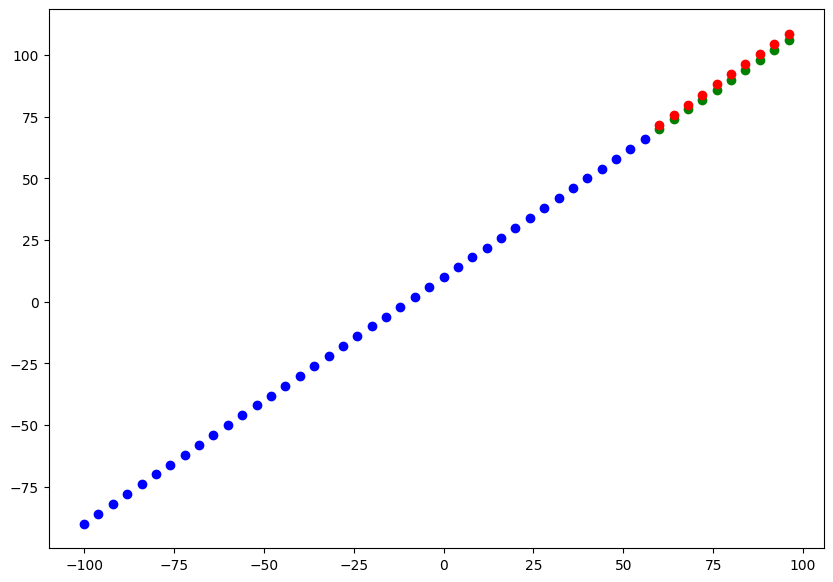

In [41]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [42]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 164ms/step - loss: 2.1533 - mae: 2.1533


[2.1533102989196777, 2.1533102989196777]

In [43]:
# Ca;culate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.674988, 13.73997 , 11.649134, 10.402475, 10.      , 10.441709,
       11.7276  , 13.857676, 16.83192 , 20.650352], dtype=float32)>

In [44]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.656265],
       [ 75.766716],
       [ 79.87717 ],
       [ 83.987625],
       [ 88.09809 ],
       [ 92.20854 ],
       [ 96.319   ],
       [100.42946 ],
       [104.5399  ],
       [108.65035 ]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.656265,  75.766716,  79.87717 ,  83.987625,  88.09809 ,
        92.20854 ,  96.319   , 100.42946 , 104.5399  , 108.65035 ],
      dtype=float32)>

In [47]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.153312>

In [48]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.7374053>

In [49]:
def MAE(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def MSE(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Model Improvement

1. Get more Data
2. Make model Larger.
3. Train for Longer

In [50]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

3 modelling Experiments

1. `model_1` = same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` = 2 layers, trained for 100 epochs.
3. `model_3` = 2 layers, trained for 500 epochs

In [51]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 23.5834 - mae: 23.5834
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 8.1905 - mae: 8.1905
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 14.9443 - mae: 14.9443
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.0938 - mae: 8.0938
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.7234 - mae: 10.7234
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9184 - mae: 9.9184
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9777 - mae: 8.9777
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0733 - mae: 9.0733
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.7816 - mae: 19.7816
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.6832 - mae: 10.6832
Epoch 11/100
2/2 [==============================] - 0s 9ms/step -

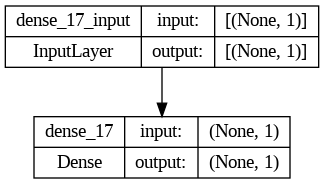

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [53]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 59ms/step


array([[56.510838],
       [60.191353],
       [63.87187 ],
       [67.55238 ],
       [71.232895],
       [74.913414],
       [78.593925],
       [82.27444 ],
       [85.954956],
       [89.63547 ]], dtype=float32)

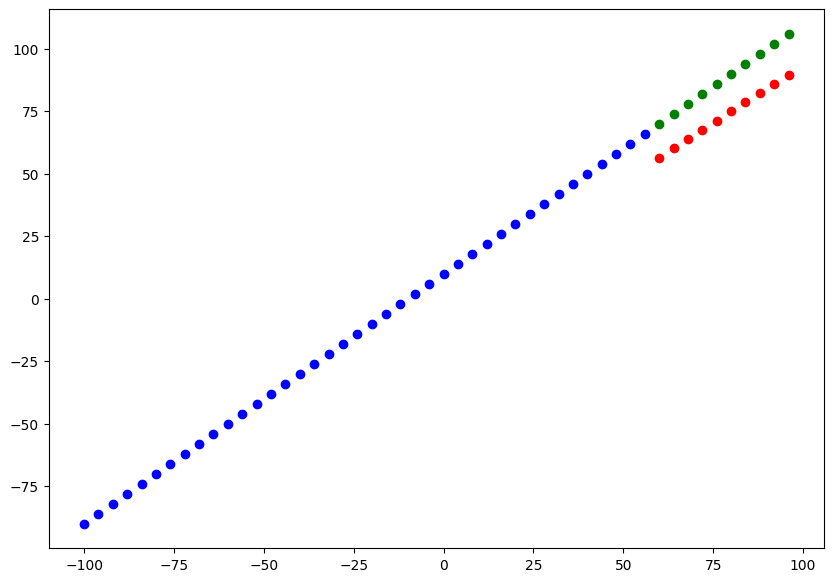

In [54]:
plot_predictions(predictions=y_pred_1)

In [55]:
mae_1 = MAE(y_true=y_test, y_pred=y_pred_1)
mse_1 = MSE(y_true = y_test, y_pred=y_pred_1)

### `model_2`

In [56]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 26.1810 - mae: 26.1810
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.5941 - mae: 24.5941
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.1224 - mae: 29.1224
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1251 - mae: 13.1251
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1428 - mae: 17.1428
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0668 - mae: 10.0668
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0428 - mae: 11.0428
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0665 - mae: 11.0665
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.1067 - mae: 40.1067
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.5490 - mae: 27.5490
Epoch 11/100
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 52ms/step


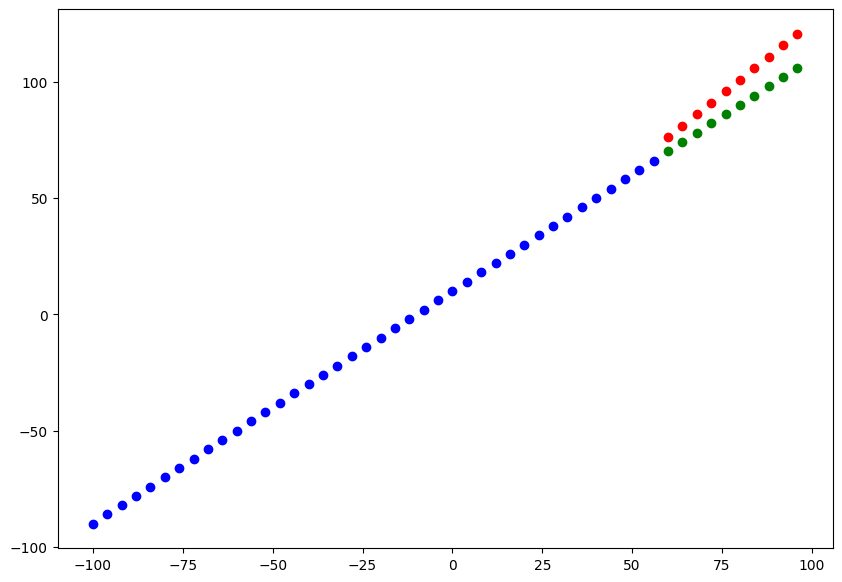

In [57]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [58]:
mae_2 = MAE(y_test, y_pred_2)

In [59]:
mse_2 = MSE(y_test, y_pred_2)

### `model_3`

In [60]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 17ms/step - loss: 34.4476 - mae: 34.4476
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 21.6628 - mae: 21.6628
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 27.7998 - mae: 27.7998
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4053 - mae: 27.4053
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 13.3835 - mae: 13.3835
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7864 - mae: 10.7864
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.7493 - mae: 11.7493
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7629 - mae: 10.7629
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 36.4609 - mae: 36.4609
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 24.2909 - mae: 24.2909
Epoch 11/500
2/2 [==============================] - 0s 9

1/1 [==============================] - 0s 145ms/step


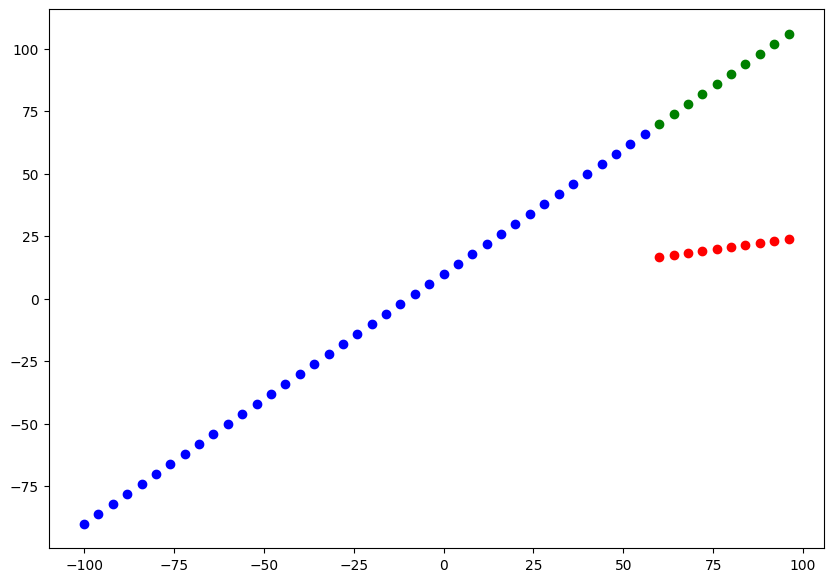

In [61]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [62]:
mae_3 = MAE(y_test, y_pred_3)
mse_3 = MSE(y_test, y_pred_3)

## COmpanring the results of experiments

In [63]:
import pandas as pd

model_list = [['model_1', mae_1.numpy(), mse_1.numpy()],
              ['model_2', mae_2.numpy(), mse_2.numpy()],
              ['model_3', mae_3.numpy(), mse_3.numpy()]]

In [64]:
pd.DataFrame(model_list, columns=['model_name', 'mae', 'mse'])

,model_name,mae,mse
0,model_1,14.926847,223.652832
1,model_2,10.277840,113.073059
2,model_3,67.858864,4689.199219


In [65]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiments

One really good habit in machine Learning modelling is to track the result of your experiments.

**Resources:** As you build more models. you'll want to look into using.
* Tensorboarrd
* Weights and Biases

## Save our model

There are two formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [66]:
model_2.save("Best_model_SavedModel_format")

In [67]:
model_2.save("Best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
# Load model
loaded_SavedModel_format = tf.keras.models.load_model('/content/Best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Comparing predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

1/1 [==============================] - 0s 102ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
model_2_pred, loaded_SavedModel_format_pred

(array([[ 76.00472 ],
        [ 80.9543  ],
        [ 85.903885],
        [ 90.85347 ],
        [ 95.803055],
        [100.75263 ],
        [105.70221 ],
        [110.651794],
        [115.60138 ],
        [120.55095 ]], dtype=float32),
 array([[ 76.00472 ],
        [ 80.9543  ],
        [ 85.903885],
        [ 90.85347 ],
        [ 95.803055],
        [100.75263 ],
        [105.70221 ],
        [110.651794],
        [115.60138 ],
        [120.55095 ]], dtype=float32))

In [72]:
loaded_h5_model = tf.keras.models.load_model('/content/Best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger Example

In [74]:
import pandas as pd

In [75]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [81]:
# Create X and y
y = insurance_one_hot['charges']
X = insurance_one_hot.drop('charges', axis = 1)

In [82]:
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [85]:
# Creating training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
# BUild neural Network
tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8565.3516 - mae: 8565.3516
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7811.6777 - mae: 7811.6777
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7596.1899 - mae: 7596.1899
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.4077 - mae: 7576.4077
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7650.3784 - mae: 7650.3784
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.7544 - mae: 7537.7544
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.0654 - mae: 7585.0654
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.3833 - mae: 7792.3833
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7611.4951 - mae: 7611.4951
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7730.0493 - mae: 7730.0493

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8358.4863 - mae: 8358.4863


[8358.486328125, 8358.486328125]

In [88]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [91]:
# Improving The model by increasing layer and changing optimizer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13247.5439 - mae: 13247.5439
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13021.7695 - mae: 13021.7695
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12580.9717 - mae: 12580.9717
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11775.6260 - mae: 11775.6260
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10538.8779 - mae: 10538.8779
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9107.9307 - mae: 9107.9307
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7942.3662 - mae: 7942.3662
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7507.8022 - mae: 7507.8022
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7445.8398 - mae: 7445.8398
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7426.7861 - mae:

In [92]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4796.8335 - mae: 4796.8335


[4796.83349609375, 4796.83349609375]

In [93]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8358.4863 - mae: 8358.4863


[8358.486328125, 8358.486328125]

In [94]:
# Model improvement by training for longer time
tf.random.set_seed(42)


insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13298.9590 - mae: 13298.9590
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13142.1631 - mae: 13142.1631
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12819.5322 - mae: 12819.5322
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12181.0576 - mae: 12181.0576
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11092.9131 - mae: 11092.9131
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9663.2988 - mae: 9663.2988
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8304.5674 - mae: 8304.5674
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7586.8472 - mae: 7586.8472
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7452.3818 - mae: 7452.3818
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7430.8433 - mae:

In [95]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3490.1711 - mae: 3490.1711


[3490.171142578125, 3490.171142578125]

In [96]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8358.4863 - mae: 8358.4863


[8358.486328125, 8358.486328125]

Text(0.5, 0, 'epochs')

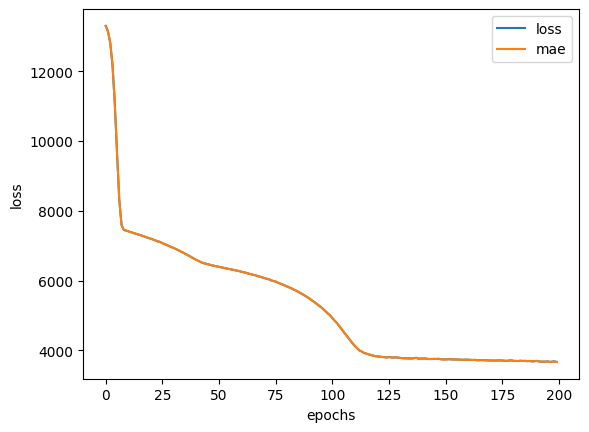

In [98]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')